In [11]:
!pip install pandas-datareader
!pip install yfinance

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [13]:
asset = 'FB'
data = yf.download(asset,  start = "2015-01-01", end= "2019-12-31")['Adj Close']
returns = data.pct_change()

data.head(5) 

[*********************100%***********************]  1 of 1 completed


Date
2015-01-02    78.449997
2015-01-05    77.190002
2015-01-06    76.150002
2015-01-07    76.150002
2015-01-08    78.180000
Name: Adj Close, dtype: float64

In [14]:
last_price = data[-1]
last_price

#Number of Simulations
num_simulations = 1000
num_days = 180
num_days_1 = num_days-1
simulation_df = pd.DataFrame()

In [15]:
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == num_days_1:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
#simulation_df.head()

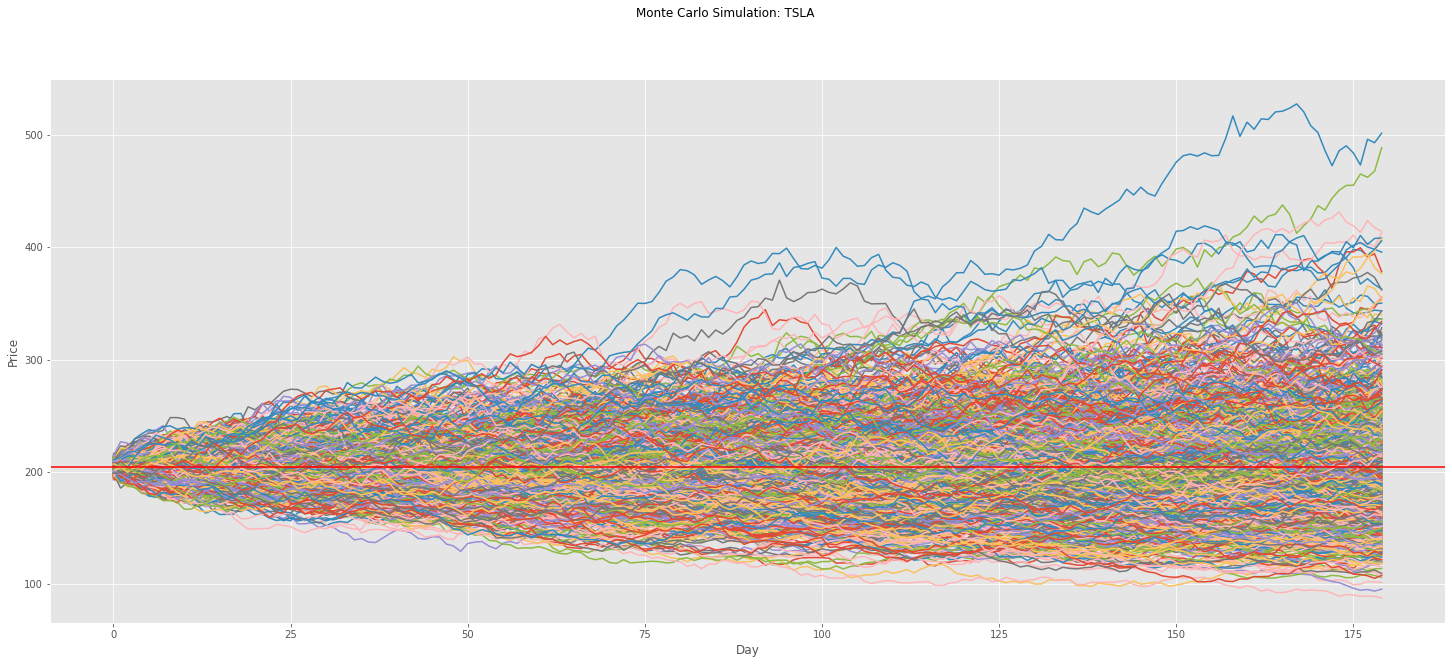

In [16]:
fig = plt.figure(figsize = (25, 10))
fig.suptitle('Monte Carlo Simulation: TSLA')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [17]:
pred_vals = np.array(price_series)
predicted_prices = pd.DataFrame(pred_vals)

In [18]:
predicted_prices.head(10)

,0
0,202.056472
1,207.697022
2,202.480138
3,200.407877
4,204.056169
5,210.001981
6,211.818534
7,215.654189
8,222.451171
9,225.210702


In [19]:
# fig = plt.figure(figsize = (25, 10))
# fig.suptitle('Comparison of MC')
# plt.plot(predicted_prices)
# plt.xlabel('Day')
# plt.ylabel('Price')
# plt.show()

In [20]:
#data1 is for validating the prediction result. 
data1 = yf.download(asset, start = "2019-12-31")['Adj Close']
data1.head(10)

[*********************100%***********************]  1 of 1 completed


Date
2019-12-31    205.250000
2020-01-02    209.779999
2020-01-03    208.669998
2020-01-06    212.600006
2020-01-07    213.059998
2020-01-08    215.220001
2020-01-09    218.300003
2020-01-10    218.059998
2020-01-13    221.910004
2020-01-14    219.059998
Name: Adj Close, dtype: float64

In [21]:
data1.reset_index(drop=True, inplace=True)
data1 = pd.DataFrame(data1)
#data1

,Adj Close
0,205.250000
1,209.779999
2,208.669998
3,212.600006
4,213.059998
...,...
475,340.769989
476,338.690002
477,345.299988
478,341.010010


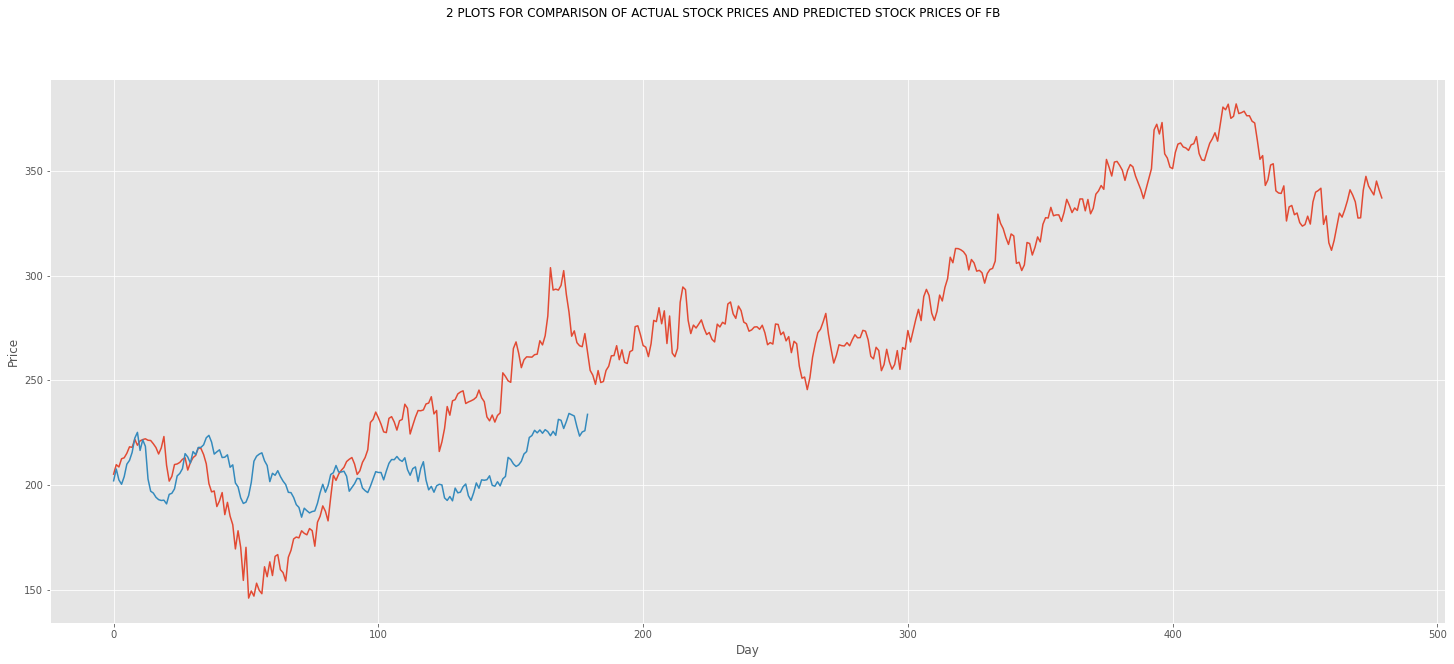

In [22]:
fig = plt.figure(figsize = (25, 10))
fig.suptitle('2 PLOTS FOR COMPARISON OF ACTUAL STOCK PRICES AND PREDICTED STOCK PRICES OF '+asset+' ')
plt.plot(data1, label = 'Actual Stock Price of '+asset+'')
plt.plot(predicted_prices, label = 'Testing prediction')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()